# project 1 ~ Santander Future Transaction Prediction

In [1]:
#loading libaries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [2]:
#set working directory
os.chdir("C:/python")


In [3]:
#check wd
os.getcwd()

'C:\\python'

In [4]:
#load the data
train = pd.read_csv("train.csv")


#####data exploration #####

In [7]:
#datatypes of data
train.dtypes


ID_code     object
target      object
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [6]:
#converting datatype
train['target'] = train['target'].astype(object)

#variables and observations
train.shape

(200000, 202)

############   DATA PRE-PROCSSING   ##############

In [8]:
###### Missing Value Analysis ######
train.isnull().sum()

#here we can see no missing values there so, no need to apply whole process

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a4637ccc48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4637ccd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a46389afc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a463673ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a4636b8748>],
 'means': []}

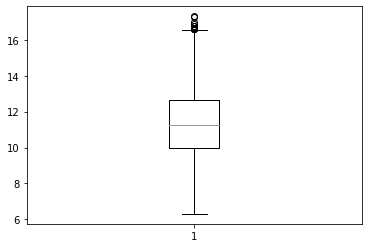

In [9]:
### Outlier Analysis ###
#plot boxplot
get_ipython().run_line_magic('matplotlib', 'inline')

plt.boxplot(train['var_121'])



In [10]:
#select only numeric
cnames = train.select_dtypes(include=np.number)


In [11]:
#finding & removing outliers
for i in cnames:
    print(i)
    q75, q25 = np.percentile(train.loc[:,i], [75,25])
    iqr = q75 - q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    #print(min)
    #print(max)
 
    train = train.drop(train[train.loc[:,i] < min].index)
    train = train.drop(train[train.loc[:,i] > max].index)


var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

In [12]:
train.shape

(175073, 202)

In [13]:
###### Feature Selection ######

#select only numeric variabe
cnames = train.select_dtypes(include=np.number)

cnames


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,13.2152,-5.8006,9.7260,6.5910,12.4612,-7.1652,6.0666,12.9887,4.8121,8.6043,...,3.9357,8.8442,1.8096,-4.8314,22.0050,0.3916,6.7302,8.9709,14.5405,6.1149
199994,12.3925,-5.8821,11.2323,3.9237,10.4509,10.7262,7.0503,18.6968,-0.4976,6.0916,...,1.3911,6.8687,3.7788,6.3378,14.4656,-1.4843,-3.9299,9.1164,16.3170,-7.5048
199995,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199997,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995


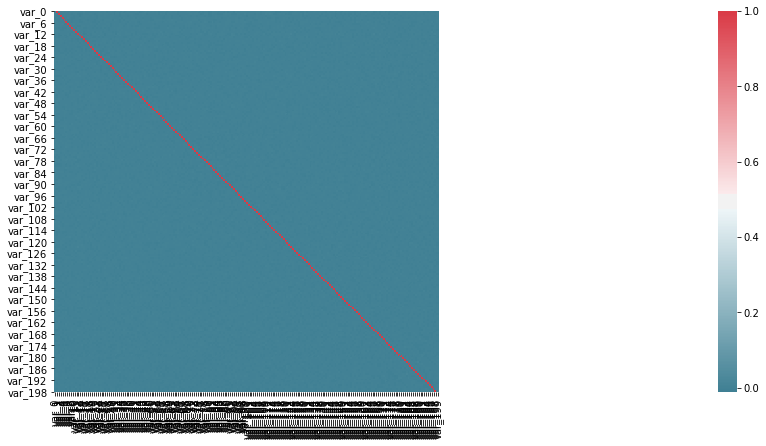

In [14]:
#heatmap

#dimensions of heatmap
f, ax = plt.subplots(figsize=(100, 7))

#correlation matrix
corr = cnames.corr()

#plot
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

#no need to drop any variable as all are important.no co-variance between independent variables

(array([  23.,   24.,   39.,   61.,   71.,   83.,  135.,  161.,  216.,
         239.,  311.,  375.,  418.,  522.,  557.,  610.,  652.,  656.,
         733.,  785.,  876.,  954.,  935., 1026., 1023., 1168., 1206.,
        1263., 1431., 1404., 1488., 1693., 1897., 1913., 1956., 2161.,
        2214., 2289., 2388., 2543., 2528., 2729., 2778., 2877., 2881.,
        3104., 3128., 3182., 3270., 3314., 3396., 3279., 3338., 3352.,
        3301., 3306., 3272., 3320., 3263., 3126., 3082., 3083., 3170.,
        3212., 3181., 3038., 2918., 2930., 2813., 2689., 2695., 2722.,
        2564., 2557., 2387., 2226., 2167., 2076., 1982., 1874., 1698.,
        1720., 1623., 1437., 1410., 1309., 1168., 1112., 1036.,  903.,
         822.,  770.,  672.,  580.,  591.,  535.,  478.,  359.,  350.,
         306.,  255.,  265.,  203.,  179.,  154.,  107.,   97.,   87.,
          81.,   70.,   51.,   36.]),
 array([-5.7195    , -5.30788661, -4.89627321, -4.48465982, -4.07304643,
        -3.66143304, -3.24981964, -2.

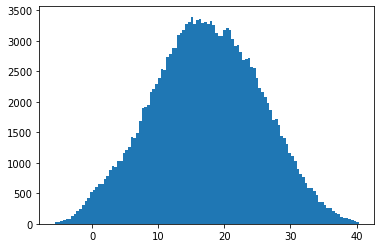

In [15]:
######### Feature scaling #########

#plot histogram to check normalisation
get_ipython().run_line_magic('matplotlib', 'inline')
plt.hist(train['var_21'], bins='auto')

#normally distributed


In [16]:
#select only numeric variable
cnames = train.select_dtypes(include=np.number)

In [17]:
#standardisation
for i in cnames:
    train[i] = (train[i] - train[i].mean())/train[i].std()



####### MODELLING  ########

In [26]:
train.shape

(175073, 201)

In [23]:
#drop a variable
train = train.drop("ID_code", axis=1)

In [36]:
train = train.astype(float)

In [38]:
# divide data into train & test
sample = np.random.rand(len(train)) < 0.8

train_df = train[sample]
test = train[~sample]


######logistic regression #######

In [42]:
# select independent variables
train_cols = train.columns[1:201]


In [43]:
logit = sm.Logit(train_df['target'], train_df[train_cols]).fit()


Optimization terminated successfully.
         Current function value: 0.660384
         Iterations 5


In [45]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               140145
Model:                          Logit   Df Residuals:                   139945
Method:                           MLE   Df Model:                          199
Date:                Tue, 07 Jan 2020   Pseudo R-squ.:                  -1.055
Time:                        12:48:18   Log-Likelihood:                -92550.
converged:                       True   LL-Null:                       -45026.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0561      0.006     10.131      0.000       0.045       0.067
var_1          0.0479      0.006      8.685      0.000       0.037       0.059
var_2          0.0587      0.006     10.611      0.000       0.048       0.070
var_3          0.0100      0.006      1.803      0.071      -0.001       0.021
var_4          0.0120      0.006      2.180      0.029       0.001       0.023
var_5          0.0348      0.006      6.286      0.000       0.024       0.046
var_6          0.0745      0.006     13.437      0.000       0.064       0.085
var_7         -0.0021      0.006     -0.381      0.703      -0.013       0.009
var_8          0.0232      0.006      4.199      0.000       0.012       0.034
var_9         -0.0430      0.006     -7.781      0.000      -0.054      -0.032
var_10        -0.0023      0.006     -0.410      0.682      -0.013       0.009
var_11         0.0229      0.006      4.146      0.000       0.012       0.034
var_12        -0.0763      0.006    -13.764      0.000      -0.087      -0.065
var_13        -0.0590      0.006    -10.666      0.000      -0.070      -0.048
var_14        -0.0032      0.006     -0.577      0.564      -0.014       0.008
var_15         0.0192      0.006      3.467      0.001       0.008       0.030
var_16         0.0082      0.006      1.485      0.138      -0.003       0.019
var_17         0.0019      0.006      0.342      0.733      -0.009       0.013
var_18         0.0477      0.006      8.624      0.000       0.037       0.059
var_19         0.0076      0.006      1.384      0.166      -0.003       0.018
var_20        -0.0194      0.006     -3.517      0.000      -0.030      -0.009
var_21        -0.0604      0.006    -10.936      0.000      -0.071      -0.050
var_22         0.0631      0.006     11.433      0.000       0.052       0.074
var_23        -0.0281      0.006     -5.086      0.000      -0.039      -0.017
var_24         0.0294      0.006      5.316      0.000       0.019       0.040
var_25         0.0137      0.006      2.468      0.014       0.003       0.025
var_26         0.0669      0.006     12.086      0.000       0.056       0.078
var_27         0.0003      0.006      0.053      0.958      -0.011       0.011
var_28        -0.0300      0.006     -5.435      0.000      -0.041      -0.019
var_29         0.0051      0.006      0.914      0.360      -0.006       0.016
var_30      5.716e-05      0.006      0.010      0.992      -0.011       0.011
var_31        -0.0272      0.006     -4.918      0.000      -0.038      -0.016
var_32         0.0287      0.006      5.192      0.000       0.018       0.040
var_33        -0.0463      0.006     -8.369      0.000      -0.057      -0.035
var_34        -0.0529      0.006     -9.558      0.000      -0.064      -0.042
var_35         0.0431      0.006      7.792      0.000       0.032       0.054
var_36        -0.0387      0.006     -7.007      0.000      -0.050      -0.028
var_37         0.0108      0.006      1.949      0.051   -6.32e-05       0.022
va

In [46]:
# prediction
test["Actual_prob"] = logit.predict(test[train_cols])


D:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
#converting predicted probabilities to 0 & 1
test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0


D:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\python\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
test.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,Actual_prob,ActualVal
13,1.0,1.876550,0.797603,2.287223,0.263033,0.658176,1.394612,-0.677475,1.295533,0.245159,...,1.700395,0.190759,-0.200976,-0.814371,1.354472,0.145254,-0.089787,-0.721902,0.744820,1
16,0.0,-1.853135,0.470470,1.677473,-1.535629,1.511448,-0.187694,-0.152827,-1.953160,0.680523,...,-0.932365,1.224004,0.500286,0.405484,-1.062489,-0.294588,1.457879,1.388782,0.301046,0
27,0.0,0.012005,-2.060868,0.093110,-0.014528,-0.245764,-0.999331,-1.048835,0.245360,1.185702,...,-0.225995,-0.062189,-0.700647,1.946667,1.244223,-0.992996,1.443895,0.154636,0.426527,0
37,0.0,-1.536644,0.173493,-0.512731,0.276152,0.597263,1.508645,-0.026611,1.332403,0.720323,...,0.044983,1.260863,-1.725323,-0.875830,0.273045,-0.631635,-0.687459,1.249299,0.514400,1
38,0.0,1.989743,0.939151,0.636611,-1.520454,1.077900,0.808968,0.309464,0.514956,-0.713632,...,1.113505,-0.084704,-0.116741,2.136166,-0.899783,0.018360,-0.603790,-1.736724,0.440264,0


In [49]:
#Confusion matrix logistic regression
CM = pd.crosstab(test['target'], test['ActualVal'])

#save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [50]:
#logistic regression
CM

ActualVal,0,1
target,,
0.0,17604,13994
1.0,315,3015


In [52]:
315/(315+3015)

0.0945945945945946

In [38]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)

FNR = FN/(FN+TP)

Accuracy = 59.98
FNR = 92.94

59.080691642651296
9.294012511170688


#####Naive bayes #####

In [53]:
#independent & dependent variables
x_train = train.iloc[:,1:201]
y_train = train.iloc[:,0]
x_test = test.iloc[:,1:201]
y_test = test.iloc[:,0]

In [54]:
NB_model = GaussianNB().fit(x_train, y_train)


In [55]:
#prediction
NB_predictions = NB_model.predict(x_test)


In [56]:
#Confusion matrix naive bayes
CM = pd.crosstab(y_test, NB_predictions)


In [57]:
#save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [58]:
CM

col_0,0.0,1.0
target,,
0.0,31103,495
1.0,2134,1196


In [91]:
#naive bayes
Accuracy = 92.47

FNR = 64.08



#####Random forest #####

In [65]:
train_sample = train.sample(85000)

In [69]:
# divide into train & test
sample = np.random.rand(len(train_sample)) < 0.8

train_df = train_sample[sample]
test = train_sample[~sample]


In [74]:
#independent & dependent variables
x_train = train_df.iloc[:,1:201]
y_train = train_df.iloc[:,0]
x_test = test.iloc[:,1:201]
y_test = test.iloc[:,0]


In [75]:
RF_model = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)


In [76]:
#prediction
RF_predictions = RF_model.predict(x_test)

    


In [78]:
CM = confusion_matrix(y_test,RF_predictions)

In [79]:
CM

array([[15556,     0],
       [ 1617,     0]], dtype=int64)

In [80]:
#Confusion matrix random forest
CM = pd.crosstab(y_test, RF_predictions)


In [81]:
CM

col_0,0.0
target,
0.0,15556
1.0,1617


In [ ]:
#randpm forest

accuracy = 90.58
FNR = 100 (error)


#here we will freeze naive bayes model as it gives high accuracy and min. FNR which is our concern

# ~prediction on test.csv

In [84]:
#importing large test data
santander = pd.read_csv("test.csv")


In [87]:
#split numeric variables & ID_code
ID_code = santander[santander.columns[0]]
santander = santander.drop("ID_code", axis=1)

In [90]:
### Missing Value Analysis ###

santander.isnull().sum()

#no missing value found so no need to do whole process

var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 200, dtype: int64

#####Feature Scaling #######

(array([2.000e+00, 5.000e+00, 5.000e+00, 1.000e+00, 9.000e+00, 1.000e+00,
        2.000e+00, 6.000e+00, 1.600e+01, 2.400e+01, 2.800e+01, 3.900e+01,
        2.200e+01, 4.500e+01, 4.800e+01, 7.900e+01, 1.180e+02, 1.790e+02,
        1.480e+02, 1.930e+02, 2.380e+02, 3.660e+02, 3.840e+02, 4.640e+02,
        5.200e+02, 6.120e+02, 6.230e+02, 7.000e+02, 7.770e+02, 7.370e+02,
        7.130e+02, 9.100e+02, 9.770e+02, 9.770e+02, 1.037e+03, 1.054e+03,
        1.125e+03, 1.218e+03, 1.262e+03, 1.610e+03, 1.498e+03, 1.762e+03,
        1.626e+03, 1.831e+03, 1.864e+03, 2.033e+03, 2.173e+03, 2.272e+03,
        2.190e+03, 2.443e+03, 2.716e+03, 2.677e+03, 2.950e+03, 2.805e+03,
        3.068e+03, 3.137e+03, 3.168e+03, 3.370e+03, 3.367e+03, 3.372e+03,
        3.365e+03, 3.555e+03, 3.322e+03, 3.451e+03, 3.486e+03, 3.739e+03,
        3.639e+03, 3.726e+03, 3.653e+03, 3.684e+03, 3.655e+03, 3.476e+03,
        3.520e+03, 3.578e+03, 3.528e+03, 3.403e+03, 3.235e+03, 3.378e+03,
        3.406e+03, 3.247e+03, 3.242e+0

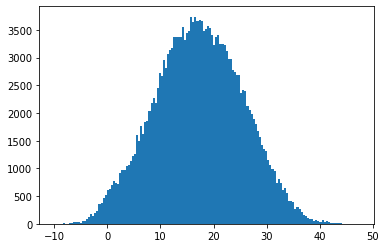

In [95]:
#plot histogram to check normalisation
get_ipython().run_line_magic('matplotlib', 'inline')
plt.hist(santander['var_21'], bins='auto')

#normally distributed


In [96]:
#select only numeric
cnames = santander.select_dtypes(include=np.number)

In [99]:
#standardisation
for i in cnames:
    santander[i] = (santander[i] - santander[i].mean())/santander[i].std()



In [102]:
#prediction
NB_predictions_test = NB_model.predict(santander)

In [104]:
#converting target float to int
NB_predictions_test = NB_predictions_test.astype(int)

In [106]:
NB_predictions_test = pd.DataFrame(NB_predictions_test)

In [108]:
#column bind target results with ID_code
ID_code_target = pd.concat([ID_code, NB_predictions_test], axis=1, ignore_index=True)


In [109]:
#renaming columns
ID_code_target.columns = ['ID_code','Target']

In [110]:
#saving output in excel format
ID_code_target.to_excel("Target  value final - Python.xlsx", index = False)

